[*********************100%***********************]  3 of 3 completed
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02113D+00    |proj g|=  1.01120D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2      8      1     0     0   6.536D-02  -3.021D+00
  F =  -3.0211314679504304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RMSE: 0.011634378167810811


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:

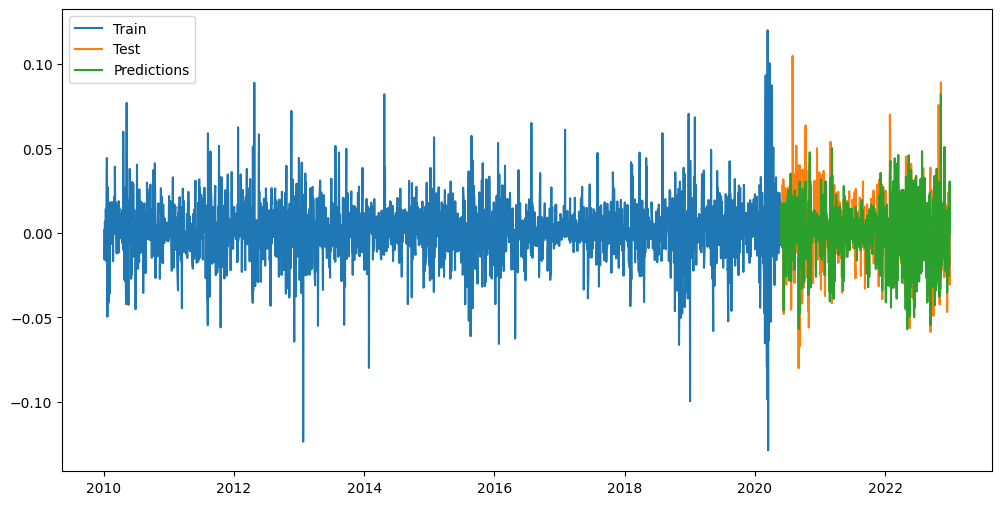

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Fetch data
stock = 'AAPL'
indices = ['^GSPC', '^IXIC']
start_date = '2010-01-01'
end_date = '2022-12-31'

data = yf.download(tickers=[stock] + indices, start=start_date, end=end_date, interval='1d')

# Preprocess data
data = data['Adj Close']
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data_pct = data.pct_change().dropna()

# Train-test split
train_size = int(len(data_pct) * 0.8)
train_data = data_pct[:train_size]
test_data = data_pct[train_size:]

# SARIMAX model training
model = SARIMAX(train_data[stock], exog=train_data[indices], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

# Model evaluation
predictions = model_fit.predict(start=len(train_data), end=len(data_pct)-1, exog=test_data[indices])
mse = mean_squared_error(test_data[stock], predictions)
rmse = sqrt(mse)

print(f'RMSE: {rmse}')

# Forecast
forecast_period = 5
forecast = model_fit.forecast(steps=forecast_period, exog=test_data[indices].iloc[-forecast_period:])

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(data_pct.index[:train_size], train_data[stock], label='Train')
plt.plot(data_pct.index[train_size:], test_data[stock], label='Test')
plt.plot(data_pct.index[train_size:], predictions, label='Predictions')
plt.legend()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import datetime

# Fetch data
stock = 'AAPL'
indices = ['^GSPC', '^IXIC']
start_date = '2010-01-01'
end_date = '2022-12-31'

data = yf.download(tickers=[stock] + indices, start=start_date, end=end_date, interval='1d')

# Preprocess data
data = data['Adj Close']
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data_pct = data.pct_change().dropna()

# Train-test split
train_size = int(len(data_pct) * 0.8)
train_data = data_pct[:train_size]
test_data = data_pct[train_size:]

# SARIMAX model training
model = SARIMAX(train_data[stock], exog=train_data[indices], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

# Model evaluation
predictions = model_fit.predict(start=len(train_data), end=len(data_pct)-1, exog=test_data[indices])
mse = mean_squared_error(test_data[stock], predictions)
rmse = sqrt(mse)

print(f'RMSE: {rmse}')

# Forecast
forecast_period = 5
last_known_indices = test_data[indices].iloc[-1:].values.repeat(forecast_period, axis=0)
forecast = model_fit.get_prediction(start=len(data_pct), end=len(data_pct) + forecast_period - 1, dynamic=True, exog=last_known_indices).predicted_mean

# Create forecast index (dates)
last_date = data_pct.index[-1]
forecast_dates = pd.date_range(start=last_date + datetime.timedelta(days=1), periods=forecast_period, closed='right')
forecast.index = forecast_dates

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(data_pct.index[:train_size], train_data[stock], label='Train')
plt.plot(data_pct.index[train_size:], test_data[stock], label='Test')
plt.plot(data_pct.index[train_size:], predictions, label='Predictions')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()


[*********************100%***********************]  3 of 3 completed
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02113D+00    |proj g|=  1.01120D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2      8      1     0     0   6.536D-02  -3.021D+00
  F =  -3.0211314474720656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RMSE: 0.011634384997575067


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:

ValueError: Provided exogenous values are not of the appropriate shape. Required (660, 2), got (5, 2).